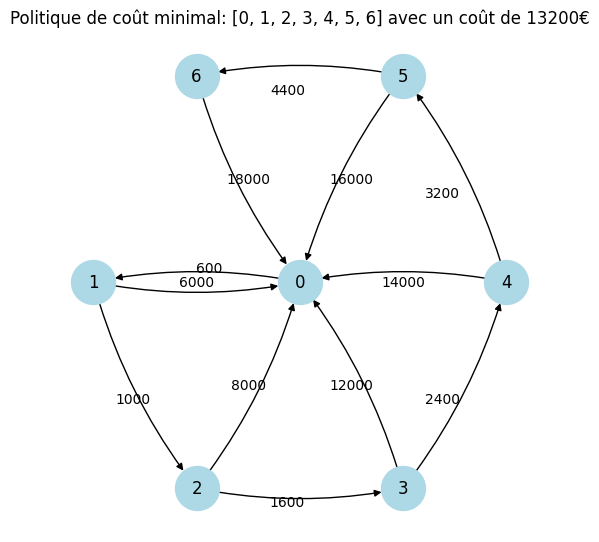

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Coûts et valeurs
achat = 20000
ages = [0, 1, 2, 3, 4, 5, 6]
revente = [0, 14000, 12000, 8000, 6000, 4000, 2000]
entretien = [0, 600, 1000, 1600, 2400, 3200, 4400]

# Créer le graphe
G = nx.DiGraph()

# Ajouter les nœuds
for age in ages:
    G.add_node(age)

# Ajouter les arêtes d'entretien (pour avancer d'une année)
for i in range(len(ages) - 1):
    G.add_edge(ages[i], ages[i + 1], weight=entretien[i + 1])

# Ajouter les arêtes de revente (pour retourner à l'année 0)
for i, age in enumerate(ages[1:], 1):
    G.add_edge(age, 0, weight=achat - revente[i])

# Position des nœuds
shell_pos = [[0], [1, 2, 3, 4, 5, 6]]

# Afficher le graphe
plt.figure(figsize=(5, 5))
pos = nx.shell_layout(G, shell_pos)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', connectionstyle="arc3,rad=0.1")

# Affichage des étiquettes des arêtes
labels = nx.get_edge_attributes(G, 'weight')
for label_pos, label in labels.items():
    start, end = label_pos
    # Calcul d'un décalage pour la position des étiquettes, surtout pour les arêtes multiples
    offset = (0.03 if start == 0 else -0.03) if end - start == 1 else 0
    x = (pos[start][0] + pos[end][0]) / 2 + offset
    y = (pos[start][1] + pos[end][1]) / 2 + offset
    plt.text(x, y, str(label), horizontalalignment='center', verticalalignment='center')
    
    
# Chercher la politique de coût minimal (path with 6 edges with minimum cost)
all_paths = list(nx.all_simple_paths(G, source=0, target=6, cutoff=6))
path_costs = [(path, sum(G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1))) for path in all_paths if len(path) == 7]
min_path, min_cost = min(path_costs, key=lambda x: x[1])

plt.title(f"Politique de coût minimal: {min_path} avec un coût de {min_cost}€")


plt.show()
